In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load training data
data = np.load("species_train.npz")
train_locs = data['train_locs']  # 2D array of lat/long
train_ids = data['train_ids']  # 1D array of species IDs

# Combine locations and IDs into a DataFrame
df_train = pd.DataFrame(train_locs, columns=['latitude', 'longitude'])
df_train['species_id'] = train_ids

#Keep coordinates that are within florida boundaries
df_train_temp = df_train[ (df_train['latitude'] >= 24.27) & (df_train['latitude'] <= 31.20)]
df_train = df_train_temp[ (df_train_temp['longitude'] <= -80.02) & (df_train['longitude'] >= -87.38)]

##print(len(df_train['species_id']))
##print(len(set(df_train['species_id'])))
##print(set(df_train['species_id']))
##df_train.head()

C:\Users\ishit\AppData\Local\Temp\ipykernel_22664\1205390645.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train = df_train_temp[ (df_train_temp['longitude'] <= -80.02) & (df_train['longitude'] >= -87.38)]


Clusters: 2, Davies-Bouldin Index: 0.7724099365894892
Clusters: 3, Davies-Bouldin Index: 0.6540085906307324
Clusters: 4, Davies-Bouldin Index: 0.675456822122587
Clusters: 5, Davies-Bouldin Index: 0.6570350579049105
Clusters: 6, Davies-Bouldin Index: 0.7332733298256628
Clusters: 7, Davies-Bouldin Index: 0.6954095089912721
Clusters: 8, Davies-Bouldin Index: 0.6998952993632014
Clusters: 9, Davies-Bouldin Index: 0.5537020947226142
Clusters: 10, Davies-Bouldin Index: 0.5776974382179719
Clusters: 11, Davies-Bouldin Index: 0.6240050015396506
Clusters: 12, Davies-Bouldin Index: 0.6268857026827493
Clusters: 13, Davies-Bouldin Index: 0.6480389949504446
Clusters: 14, Davies-Bouldin Index: 0.6930184018259625
Clusters: 15, Davies-Bouldin Index: 0.6747021097226878
Clusters: 16, Davies-Bouldin Index: 0.6926824807965017
Clusters: 17, Davies-Bouldin Index: 0.7025998339767148
Clusters: 18, Davies-Bouldin Index: 0.7185260413935789
Clusters: 19, Davies-Bouldin Index: 0.7253240831535115
Clusters: 20, Davie

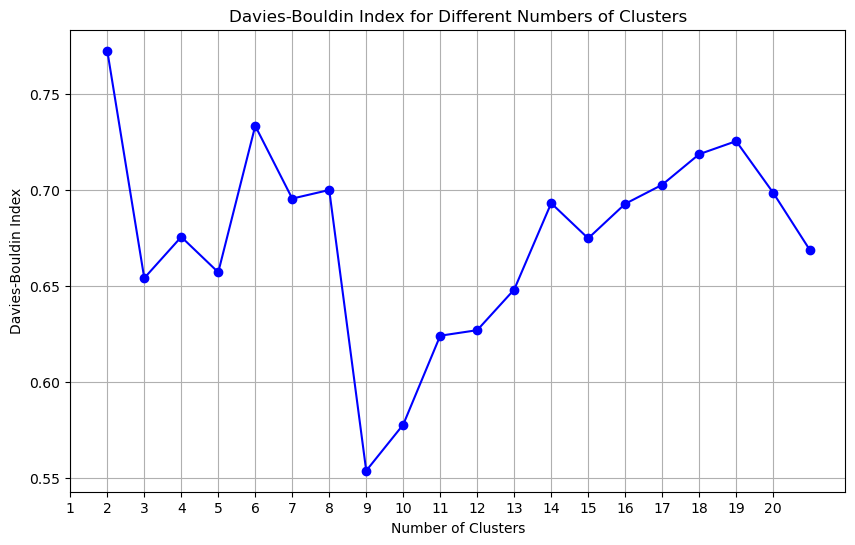

In [15]:
X = df_train[['latitude', 'longitude']]

## Check k val for 21 clusters 
kval = range(2, 22)
inertia_values = []
db_index = []

## Run KMeans for each k and store inertia
for k in kval:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

    labels = kmeans.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)
    db_index.append(dbi)
    print(f'Clusters: {k}, Davies-Bouldin Index: {dbi}')

## DBI Plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 22), db_index, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(range(1, 21))
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.grid(True)
plt.savefig('kmeandbi.png')
plt.show()

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ishit\AppData\Local\Temp\ipykernel_22664\3338153595.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[f'cluster'] = kmeans.labels_
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{0, 1, 2, 3, 4, 5, 6, 7, 8}


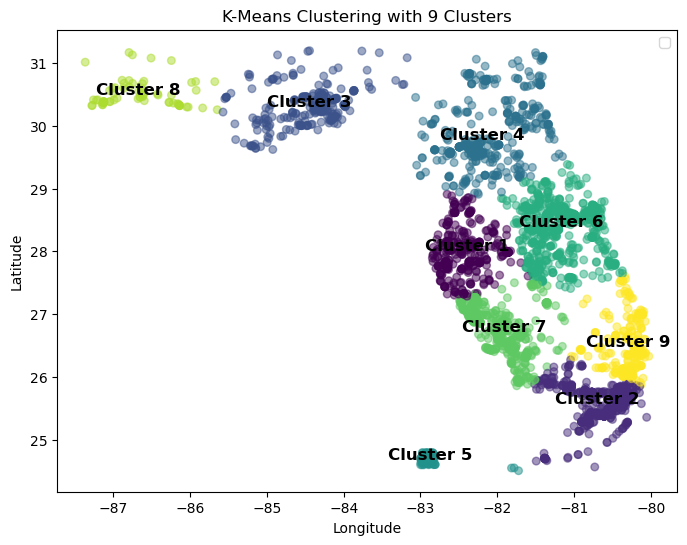

{0: '4665, 4765, 4793, 7562, 9083, 9602, 10168, 10373, 11970, 12024, 13632, 16782, 18204, 19765, 19975, 26159, 35854, 40323, 41301, 42223, 64985, 73172, 199841, 539892',
 1: '4146, 4535, 4665, 4765, 4793, 7562, 9083, 9602, 10243, 10373, 11970, 12024, 13632, 16782, 18204, 19182, 19765, 19975, 26159, 32093, 41301, 42223, 64985, 145310, 539892',
 2: '4765, 4793, 7562, 9083, 9602, 10168, 10373, 11970, 12024, 13632, 16782, 18204, 19975, 24266, 26159, 41301, 42223, 64985, 65987, 73172, 145310, 199841, 539892',
 3: '4535, 4665, 4765, 4793, 7562, 9083, 9152, 9602, 10168, 10243, 10373, 11970, 12024, 13632, 16782, 18204, 19765, 19975, 24266, 26159, 40323, 41301, 42223, 64985, 65987, 73172, 74204, 145310, 199841, 539892',
 4: '4535, 4665, 11970, 19975',
 5: '4146, 4535, 4665, 4765, 4793, 7562, 9083, 9602, 10168, 10243, 10373, 11970, 12024, 13632, 16782, 18204, 19765, 19975, 26159, 40323, 41301, 42223, 64985, 73172, 539892',
 6: '4665, 4765, 4793, 7562, 9083, 9602, 10243, 10373, 12024, 13632, 1678

In [17]:

def plot_clusters(X, n):
    ## fitting k-means
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    print(set(kmeans.labels_))
    df_train[f'cluster'] = kmeans.labels_
    
     ## Plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X['longitude'],  X['latitude'],   c=kmeans.labels_, cmap='viridis', marker='o', s=30, alpha=0.5)
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    for i, (x, y) in enumerate(kmeans.cluster_centers_):
        plt.text(y, x, f'Cluster {i+1}', color='black', fontsize=12, ha='center', va='baseline', weight='bold')
    plt.title(f'K-Means Clustering with {n} Clusters')
    plt.legend()
    plt.show()

    clusters = {}
    for cluster_id in range(n):
        ## Extract unique species for the cluster 1-9 and concat
        unique_species_ids = set(df_train[df_train['cluster'] == cluster_id]['species_id'])
        clusters[cluster_id] = ", ".join(map(str, sorted(unique_species_ids)))
    return clusters
##plot_clusters(X,n=3)
plot_clusters(X, n=9)


In [19]:
def cluster_analysis(df, species_list, cluster_col='cluster', species_col='species_id'):
    species_cluster_map = {}
    cluster_species_rank = {}
    
    ## cluster annotation for max per species
    for species in species_list:
        species_data = df[df[species_col] == species]
        species_counts = species_data.groupby(cluster_col).size()
        max_cluster = species_counts.idxmax()
        max_count = species_counts.max()
        species_cluster_map[species] = (max_cluster, max_count)
    
    ## Rank species 
    for cluster_id in df[cluster_col].unique():
        cluster_data = df[df[cluster_col] == cluster_id]
        species_counts = cluster_data.groupby(species_col).size().sort_values(ascending=False)
        cluster_species_rank[cluster_id] = species_counts.index.tolist()
    
    return species_cluster_map, cluster_species_rank

species_list=[9602, 40323, 10243, 10373, 19975, 7562, 16782, 35854, 20504, 18204, 4765, 145310, 199841, 26159, 4146, 19765, 4535, 10168, 4793, 4665, 13632, 9152, 11970, 65987, 24266, 73172, 41301, 64985, 74204, 32093, 19182, 42223, 539892, 12024, 9083, 38008]
species_cluster_map, cluster_species_rank = cluster_analysis(df_train, species_list)

for species, (cluster, count) in species_cluster_map.items():
    print(f"Species {species} has the most occurrences in Cluster {cluster} with {count} occurrences.")

for cluster, ranked_species in cluster_species_rank.items():
    print(f"Cluster {cluster}: Most popular species ranked - {ranked_species}")


Species 9602 has the most occurrences in Cluster 6 with 14 occurrences.
Species 40323 has the most occurrences in Cluster 3 with 26 occurrences.
Species 10243 has the most occurrences in Cluster 5 with 6 occurrences.
Species 10373 has the most occurrences in Cluster 0 with 4 occurrences.
Species 19975 has the most occurrences in Cluster 6 with 55 occurrences.
Species 7562 has the most occurrences in Cluster 5 with 9 occurrences.
Species 16782 has the most occurrences in Cluster 2 with 13 occurrences.
Species 35854 has the most occurrences in Cluster 0 with 1 occurrences.
Species 20504 has the most occurrences in Cluster 7 with 1 occurrences.
Species 18204 has the most occurrences in Cluster 3 with 48 occurrences.
Species 4765 has the most occurrences in Cluster 5 with 62 occurrences.
Species 145310 has the most occurrences in Cluster 7 with 2 occurrences.
Species 199841 has the most occurrences in Cluster 3 with 4 occurrences.
Species 26159 has the most occurrences in Cluster 1 with 22

In [21]:
pred= pd.read_csv('4146_AdaBoosted.csv', sep='\t')
##pred.head()
pred['Lat'].head()

0    44.317360
1    38.313877
2    39.502880
3    39.155710
4    41.330727
Name: Lat, dtype: float64

Number of points for selected species: 8254


C:\Users\ishit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ishit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


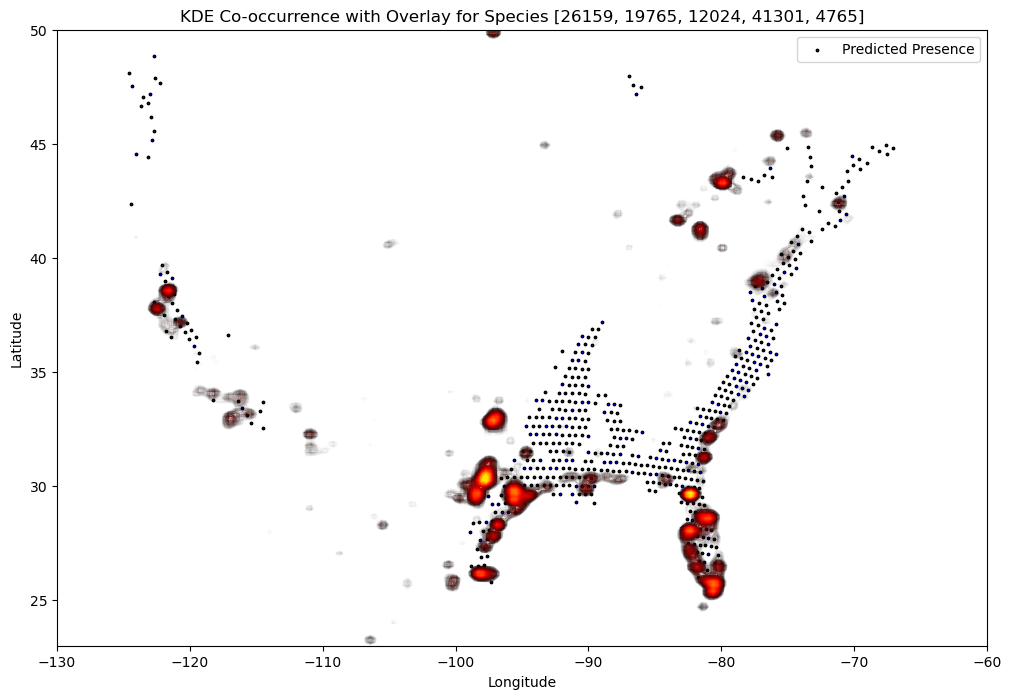

In [25]:
from matplotlib.colors import LinearSegmentedColormap

data = np.load("species_train.npz")
train_locs = data['train_locs']  # 2D array of lat/long
train_ids = data['train_ids']  # 1D array of species IDs
df_full = pd.DataFrame(train_locs, columns=['latitude', 'longitude'])
df_full['species_id'] = train_ids

df_us_temp = df_full[ (df_full['latitude'] >= 23) & (df_full['latitude'] <= 50)]
df_us = df_us_temp[ (df_us_temp['longitude'] >= -130) & (df_us_temp['longitude'] <= -60)]

species_list= [26159, 19765, 12024, 41301, 4765]
filtered_data = df_us[df_us['species_id'].isin(species_list)][['latitude', 'longitude']]
print(f"Number of points for selected species: {len(filtered_data)}")
    
custom_cmap = LinearSegmentedColormap.from_list("custom_hot", ["none", "red", "orange", "yellow"], N=256)  ##using none to make plot transparent
# Plot the KDE
filtered=pred[pred['y_pred']==1]
plt.rcdefaults()
plt.figure(figsize=(12, 8), facecolor='none')  
plt.gca().set_facecolor('none')  
plt.scatter(filtered['Lon'], filtered['Lat'], c='blue',  s=3, edgecolor='k', label='Predicted Presence')
sns.kdeplot(x=filtered_data['longitude'], y=filtered_data['latitude'], cmap=custom_cmap, fill=True, bw_adjust=0.1,levels=100, thresh=0.2)
plt.gcf().patch.set_alpha(0)   
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'KDE Co-occurrence with Overlay for Species {species_list}')    
plt.xlim(-130, -60)  # Rough US Lon
plt.ylim(23, 50)     # Rough US Lat
plt.legend()
plt.show()


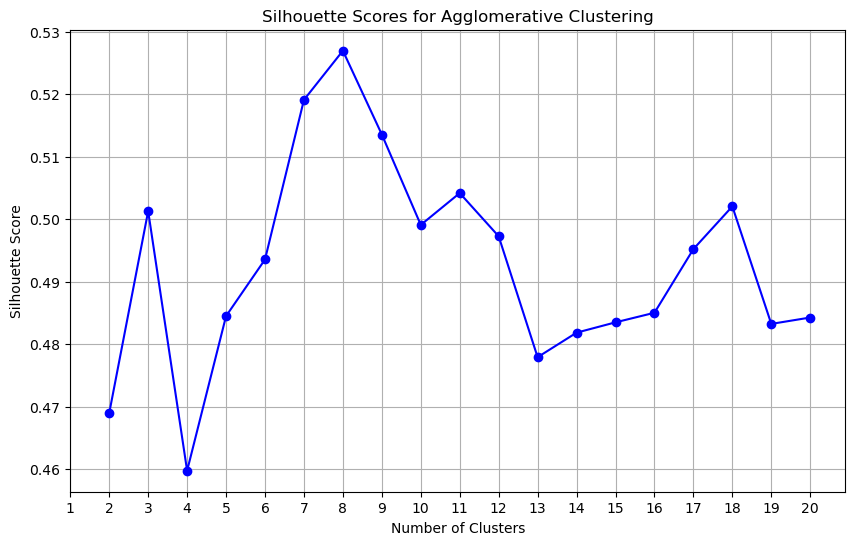

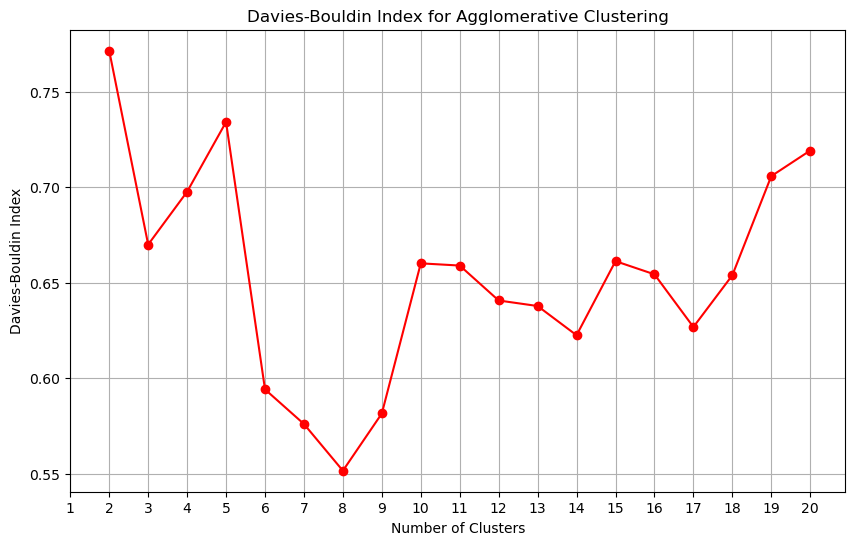

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

def agglomerative_clustering(X, clusters):
    silhouette_scores = []
    dbi_scores = []
    
    for n in clusters:
        ## Agglo clustering
        agglom = AgglomerativeClustering(n_clusters=n)
        cluster_labels = agglom.fit_predict(X)
        
        ## Silhouette 
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        
        ## DBI
        dbi = davies_bouldin_score(X, cluster_labels)
        dbi_scores.append(dbi)
    
    ## Silhouette plot
    plt.figure(figsize=(10, 6))
    plt.plot(clusters, silhouette_scores, marker='o', color='b')
    plt.xticks(range(1, 21))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Scores for Agglomerative Clustering")
    plt.grid(True)
    plt.show()
    
    ## DBI
    plt.figure(figsize=(10, 6))
    plt.plot(clusters, dbi_scores, marker='o', color='r')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Davies-Bouldin Index")
    plt.title("Davies-Bouldin Index for Agglomerative Clustering")
    plt.xticks(range(1, 21))
    plt.grid(True)
    plt.savefig("aggdbi.png")
    plt.show()
    
    return silhouette_scores, dbi_scores

##For loop range
clusters = range(2, 21)
silhouette_scores, dbi_scores = agglomerative_clustering(X, clusters)
